## 📝 Instructions

### US county-level sociodemographic and health resource data (2018-2019).

Sociodemographic and health resource data have been collected by county in the United States and we want to find out if there is any relationship between health resources and sociodemographic data.

To do this, you need to set a target variable (health-related) to conduct the analysis.

#### Step 1: Loading the dataset

The dataset can be found in this project folder under the name `demographic_health_data.csv`. You can load it into the code directly from the link (`https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv`) or download it and add it by hand in your repository. In this dataset you will find a large number of variables, which you will find defined [here](https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/data_dict.csv).

#### Step 2: Perform a full EDA

This second step is vital to ensure that we keep the variables that are strictly necessary and eliminate those that are not relevant or do not provide information. Use the example Notebook we worked on and adapt it to this use case.

Be sure to conveniently divide the data set into `train` and `test` as we have seen in previous lessons.

#### Step 3: Build a regression model

Start solving the problem by implementing a linear regression model and analyze the results. Then, using the same data and default attributes, build a Lasso model and compare the results with the baseline linear regression.

Analyze how $R^2$ evolves when the hyperparameter of the Lasso model changes (you can for example start testing from a value of 0.0 and work your way up to a value of 20). Draw these values in a line diagram.

#### Step 4: Optimize the previous model

After training the Lasso model, if the results are not satisfactory, optimize it using one of the techniques seen above.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, SplineTransformer
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv",sep=",")

In [3]:
column_names = df.columns.tolist()

from IPython.core.display import display, HTML
display(HTML(', '.join(column_names)))

C:\Users\Rashid\AppData\Local\Temp\ipykernel_10540\2986756480.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


- No columns have missing or NaN values

In [4]:
df.shape

(3140, 108)

In [5]:
categorical_columns = df.select_dtypes(include=['object']).columns

print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['COUNTY_NAME', 'STATE_NAME'], dtype='object')


In [6]:
import pandas as pd

# check for 0 values
zero_columns = df.columns[(df == 0).any()].tolist()

for column in zero_columns:
    zero_rows_count = (df[column] == 0).sum()
    print(f"Number of 0 rows in '{column}': {zero_rows_count}")


Number of 0 rows in '0-9': 1
Number of 0 rows in '0-9 y/o % of total pop': 1
Number of 0 rows in '19-Oct': 1
Number of 0 rows in '10-19 y/o % of total pop': 1
Number of 0 rows in '20-29': 1
Number of 0 rows in '20-29 y/o % of total pop': 1
Number of 0 rows in '80+': 1
Number of 0 rows in '80+ y/o % of total pop': 1
Number of 0 rows in 'Black-alone pop': 10
Number of 0 rows in '% Black-alone': 10
Number of 0 rows in 'Native American/American Indian-alone pop': 2
Number of 0 rows in '% NA/AI-alone': 2
Number of 0 rows in 'Asian-alone pop': 9
Number of 0 rows in '% Asian-alone': 9
Number of 0 rows in 'Hawaiian/Pacific Islander-alone pop': 214
Number of 0 rows in '% Hawaiian/PI-alone': 214
Number of 0 rows in 'Two or more races pop': 2
Number of 0 rows in '% Two or more races': 2
Number of 0 rows in 'N_POP_CHG_2018': 12
Number of 0 rows in 'GQ_ESTIMATES_2018': 65
Number of 0 rows in 'R_birth_2018': 3
Number of 0 rows in 'R_death_2018': 5
Number of 0 rows in 'R_NATURAL_INC_2018': 68
Number 

In [7]:
df['Obesity_prevalence'].describe()

count    3140.000000
mean       35.019299
std         4.517088
min        15.200000
25%        32.400000
50%        35.400000
75%        37.900000
max        49.900000
Name: Obesity_prevalence, dtype: float64

C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


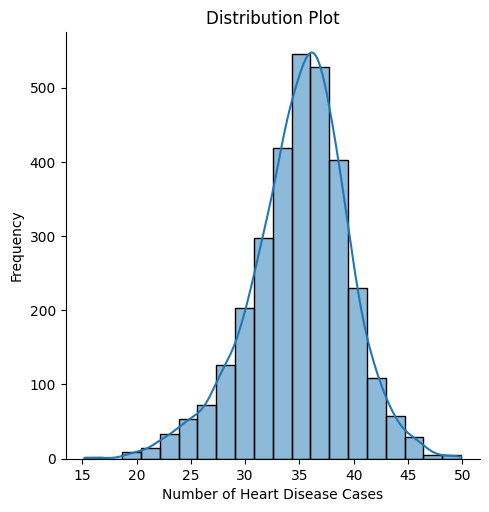

In [8]:
sns.displot(df['Obesity_prevalence'], kde=True, bins=20)  
plt.title('Distribution Plot')
plt.xlabel('Number of Heart Disease Cases')
plt.ylabel('Frequency')
plt.show()

### Feature selection based on correlation with a target variable

In [9]:

target_variable = 'Obesity_prevalence'

# Select the columns you're interested in (e.g., numerical features)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set the correlation threshold
correlation_threshold = 0.2  # Adjust as needed

# Calculate the correlations with the target variable
correlations = df[numerical_columns].corrwith(df[target_variable])

# Select features based on the correlation threshold
selected_features = correlations[abs(correlations) > correlation_threshold].index

# Create a subset DataFrame
subset_df = df[selected_features]

# Display selected features
print(selected_features)

Index(['TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '20-29', '30-39',
       '40-49', '50-59', '60-69', '70-79', '80+', 'White-alone pop',
       '% White-alone', '% Black-alone', 'Asian-alone pop', '% Asian-alone',
       'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018',
       'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_death_2018',
       'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018',
       'High school diploma only 2014-18',
       'Some college or associate's degree 2014-18',
       'Bachelor's degree or higher 2014-18',
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a high school diploma only 2014-18',
       'Percent of adults with a bachelor's degree or higher 2014-18',
       'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018', 'MEDHHINC_2018',
       'CI90LBINC_2018', 'CI90UBINC_2018', 'Civilian_labor_force_2018',
       'Employed_2018', 'Unemployed_2018', 'Unemployment_

In [10]:
### Main goal: predict
y = subset_df["Obesity_prevalence"].values
#log_y = np.log(y)
X_num = subset_df.select_dtypes(include=['number']).drop('Obesity_prevalence', axis=1)
X_cat = subset_df.select_dtypes(include=['object'])


In [11]:
# Encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoder.fit(X_cat)
X_dummies = encoder.transform(X_cat)
X_full = np.c_[X_num,X_dummies]

In [12]:
# Standardize 
scaler = StandardScaler()
X_scale = scaler.fit_transform(X_full)

In [13]:
## Split data
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=12345)

In [14]:
### Model 1
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)
print(mean_squared_error(y_pred_train, y_train))
print(mean_squared_error(y_pred_test, y_test))
ratio1 = (mean_squared_error(y_pred_train, y_train)) / (mean_squared_error(y_pred_test, y_test))
print(ratio1)    
print(r2_score(y_test, y_pred_test))  

0.0030301377745832756
0.0030920060208030086
0.9799909037034586
0.9998507444532201


In [15]:
### Model 2
model2 = Lasso(alpha = 0.1, max_iter = 300)
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)
print(mean_squared_error(y_pred_train,y_train))
print(mean_squared_error(y_pred_test,y_test))
ratio2 = mean_squared_error(y_pred_train,y_train)/mean_squared_error(y_pred_test,y_test)
print(ratio2)
print(r2_score(y_test, y_pred_test))

0.01319976049011497
0.013349599248802295
0.9887757860071517
0.9993555957777032


In [16]:
### Model 3
model3 = Ridge(alpha = 1000, max_iter = 300)
model3.fit(X_train, y_train)
y_pred_train = model3.predict(X_train)
y_pred_test = model3.predict(X_test)
print(mean_squared_error(y_pred_train,y_train))
print(mean_squared_error(y_pred_test,y_test))
ratio3 = mean_squared_error(y_pred_train,y_train)/mean_squared_error(y_pred_test,y_test)
print(ratio3)
print(r2_score(y_test, y_pred_test))

0.6874061219026616
0.6894203961061557
0.997078307785974
0.9667206928156874


In [17]:
alpha_ranges =  np.logspace(-5,5, 50)

In [18]:
mse_in = []
mse_out = []
ratio = []
for index, alpha in enumerate(alpha_ranges):
  print(f"Index {index}:{len(alpha_ranges)} - alpha {alpha}")
  model2 = Lasso(alpha = alpha, max_iter = 300)
  model2.fit(X_train, y_train)
  y_pred_train = model2.predict(X_train)
  y_pred_test = model2.predict(X_test)
  mse_in.append(mean_squared_error(y_pred_train,y_train))
  mse_out.append(mean_squared_error(y_pred_test,y_test))
  ratio.append(mean_squared_error(y_pred_train,y_train)/mean_squared_error(y_pred_test,y_test))

lasso_df = pd.DataFrame({"MSE-in":mse_in,"MSE-out":mse_out,"Ratio":ratio,"Alpha":alpha_ranges})
lasso_df


Index 0:50 - alpha 1e-05
Index 1:50 - alpha 1.5998587196060572e-05


C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.938e+00, tolerance: 5.104e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.111e+00, tolerance: 5.104e+00
  model = cd_fast.enet_coordinate_descent(


Index 2:50 - alpha 2.559547922699533e-05
Index 3:50 - alpha 4.094915062380427e-05


C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.386e+00, tolerance: 5.104e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.819e+00, tolerance: 5.104e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\l

Index 4:50 - alpha 6.55128556859551e-05
Index 5:50 - alpha 0.00010481131341546853
Index 6:50 - alpha 0.00016768329368110083


C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.052e+01, tolerance: 5.104e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.206e+01, tolerance: 5.104e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\l

Index 7:50 - alpha 0.0002682695795279727
Index 8:50 - alpha 0.00042919342601287783
Index 9:50 - alpha 0.0006866488450042998


C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.714e+01, tolerance: 5.104e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.106e+01, tolerance: 5.104e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\l

Index 10:50 - alpha 0.0010985411419875584
Index 11:50 - alpha 0.001757510624854793
Index 12:50 - alpha 0.002811768697974231


C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.287e+01, tolerance: 5.104e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.996e+01, tolerance: 5.104e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\l

Index 13:50 - alpha 0.004498432668969444
Index 14:50 - alpha 0.0071968567300115215
Index 15:50 - alpha 0.011513953993264481


C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.513e+01, tolerance: 5.104e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.198e+01, tolerance: 5.104e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\l

Index 16:50 - alpha 0.018420699693267165
Index 17:50 - alpha 0.029470517025518096
Index 18:50 - alpha 0.04714866363457394
Index 19:50 - alpha 0.07543120063354623
Index 20:50 - alpha 0.1206792640639329
Index 21:50 - alpha 0.19306977288832497
Index 22:50 - alpha 0.30888435964774846
Index 23:50 - alpha 0.49417133613238384


Index 24:50 - alpha 0.7906043210907702
Index 25:50 - alpha 1.2648552168552958
Index 26:50 - alpha 2.0235896477251556
Index 27:50 - alpha 3.2374575428176464
Index 28:50 - alpha 5.1794746792312125
Index 29:50 - alpha 8.286427728546842
Index 30:50 - alpha 13.257113655901108
Index 31:50 - alpha 21.209508879201927
Index 32:50 - alpha 33.9322177189533
Index 33:50 - alpha 54.286754393238596
Index 34:50 - alpha 86.85113737513521
Index 35:50 - alpha 138.9495494373139
Index 36:50 - alpha 222.29964825261956
Index 37:50 - alpha 355.64803062231283
Index 38:50 - alpha 568.9866029018305
Index 39:50 - alpha 910.2981779915227
Index 40:50 - alpha 1456.3484775012444
Index 41:50 - alpha 2329.951810515372
Index 42:50 - alpha 3727.593720314938
Index 43:50 - alpha 5963.623316594637
Index 44:50 - alpha 9540.954763499964
Index 45:50 - alpha 15264.179671752365
Index 46:50 - alpha 24420.53094548655
Index 47:50 - alpha 39069.39937054621
Index 48:50 - alpha 62505.51925273976
Index 49:50 - alpha 100000.0


,MSE-in,MSE-out,Ratio,Alpha
0,0.006070,0.007885,0.769803,0.000010
1,0.006059,0.007854,0.771502,0.000016
2,0.006043,0.007805,0.774182,0.000026
3,0.006018,0.007735,0.778032,0.000041
4,0.005981,0.007632,0.783609,0.000066
5,0.005926,0.007471,0.793168,0.000105
6,0.005837,0.007276,0.802260,0.000168
7,0.005658,0.006930,0.816443,0.000268
8,0.005324,0.006212,0.857153,0.000429
9,0.005026,0.005466,0.919549,0.000687


In [19]:
### Model 4
model4 = Lasso(alpha = 0.018421, max_iter = 300)
model4.fit(X_train, y_train)
y_pred_train = model4.predict(X_train)
y_pred_test = model4.predict(X_test)
print(mean_squared_error(y_pred_train,y_train))
print(mean_squared_error(y_pred_test,y_test))
ratio4 = mean_squared_error(y_pred_train,y_train)/mean_squared_error(y_pred_test,y_test)
print(ratio4)
print(r2_score(y_test, y_pred_test))

0.0035770577604607038
0.0035824586890038632
0.9984923961413045
0.9998270696024373


C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.085e+00, tolerance: 5.104e+00
  model = cd_fast.enet_coordinate_descent(
